# Lab 3 Exercise
Dataset from Kaggle Competition : House Prices  
Source : https://www.kaggle.com/c/house-prices-advanced-regression-techniques
---

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---
## Problem 1: Analysis of Numeric Variables


In [2]:
hprices = pd.read_csv('train.csv')
houseNumData = pd.DataFrame(hprices[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


### a) Check the individual statistical description and visualize the statistical distributions of each of these variables.

LotArea: Lot size in square feet

In [3]:
la = pd.DataFrame(houseNumData['LotArea'])
la.describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


GrLivArea: Above grade (ground) living area square feet

In [4]:
gla = pd.DataFrame(houseNumData['GrLivArea'])
gla.describe()

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


TotalBsmtSF: Total square feet of basement area

In [5]:
tb = pd.DataFrame(houseNumData['TotalBsmtSF'])
tb.describe()

,TotalBsmtSF
count,1460.000000
mean,1057.429452
std,438.705324
min,0.000000
25%,795.750000
50%,991.500000
75%,1298.250000
max,6110.000000


GarageArea: Size of garage in square feet

In [6]:
ga = pd.DataFrame(houseNumData['GarageArea'])
ga.describe()

,GarageArea
count,1460.000000
mean,472.980137
std,213.804841
min,0.000000
25%,334.500000
50%,480.000000
75%,576.000000
max,1418.000000


SalePrice: Price of sale

In [7]:
sp = pd.DataFrame(houseNumData['SalePrice'])
sp.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<AxesSubplot:>

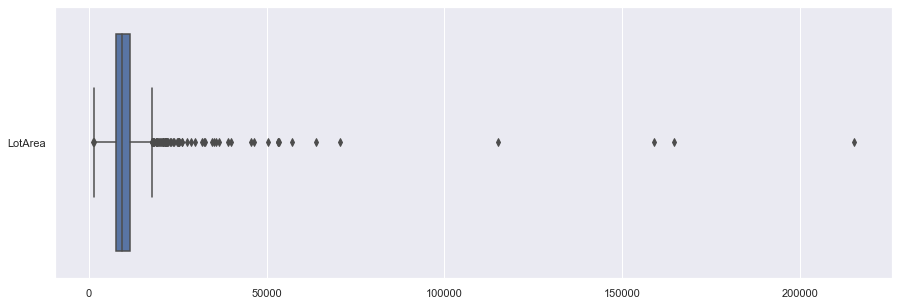

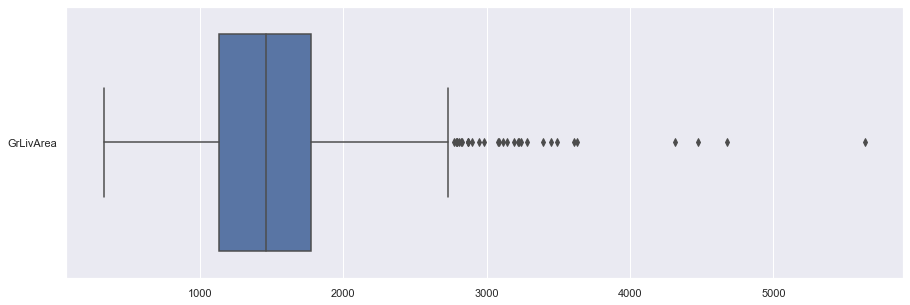

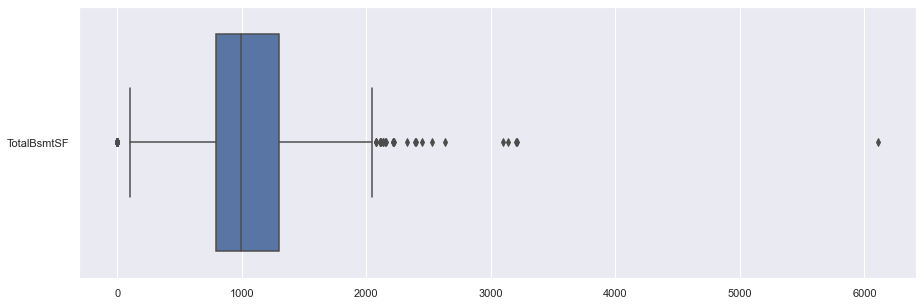

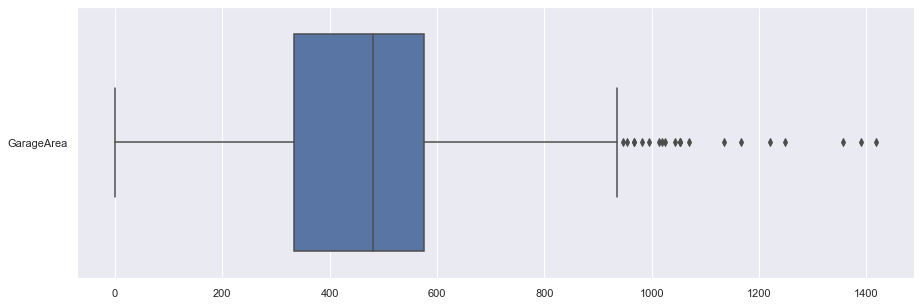

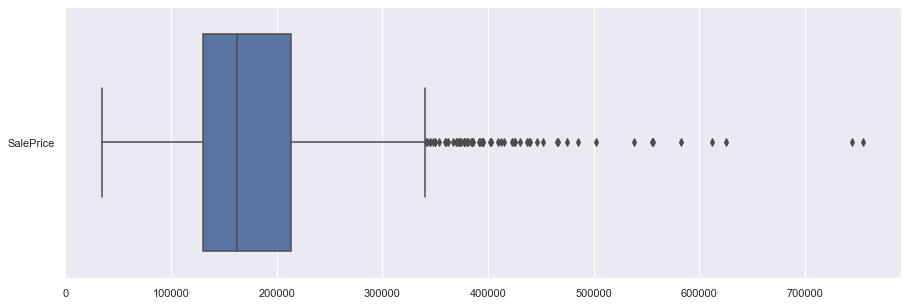

In [8]:
# Boxplots of all variables
f = plt.figure(figsize=(15, 5))
sb.boxplot(data = la, orient = "h")

f = plt.figure(figsize=(15, 5))
sb.boxplot(data = gla, orient = "h")

f = plt.figure(figsize=(15, 5))
sb.boxplot(data = tb, orient = "h")

f = plt.figure(figsize=(15, 5))
sb.boxplot(data = ga, orient = "h")

f = plt.figure(figsize=(15, 5))
sb.boxplot(data = sp, orient = "h")

<AxesSubplot:>

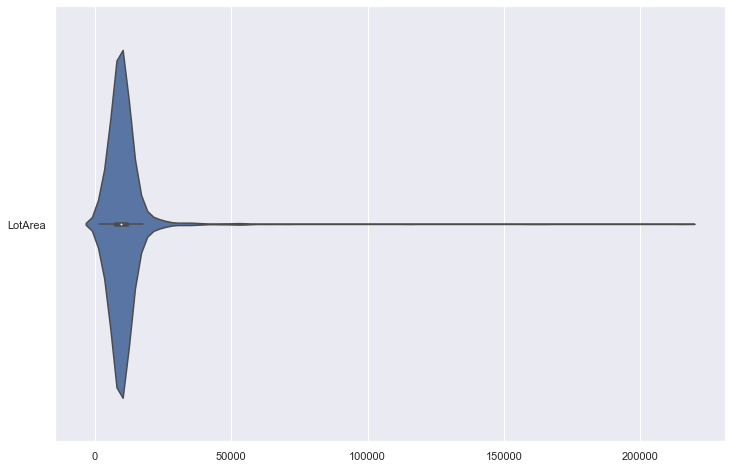

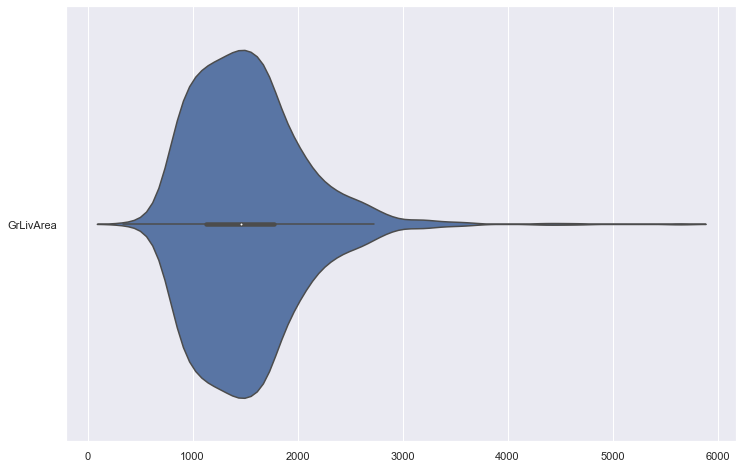

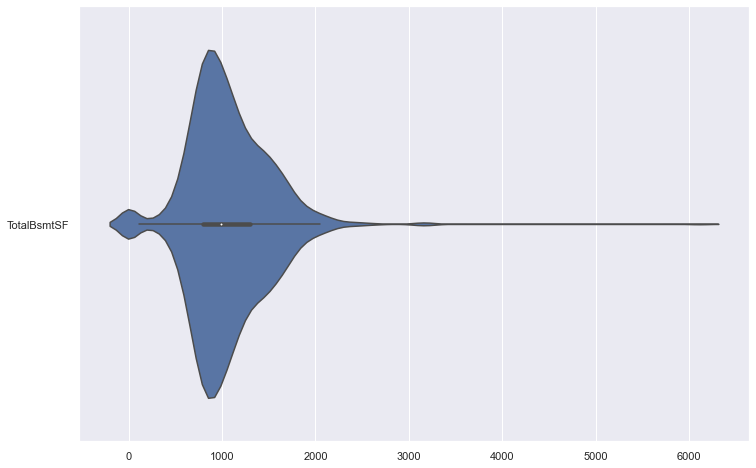

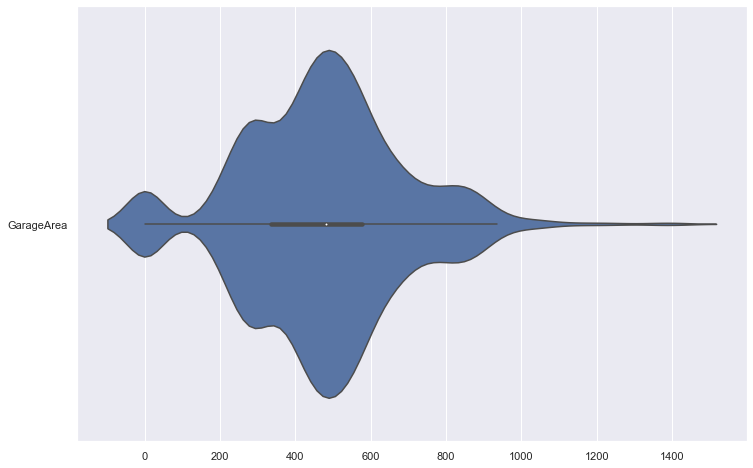

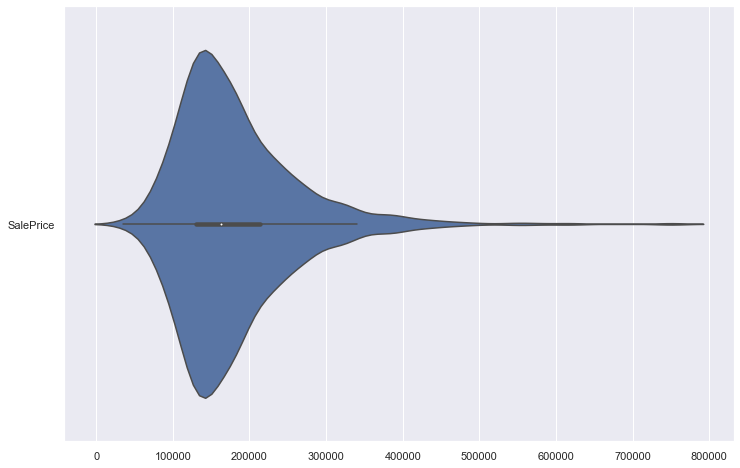

In [9]:
# Violinplots of all the variables

f = plt.figure(figsize=(12, 8))
sb.violinplot(data = la, orient='h')

f = plt.figure(figsize=(12, 8))
sb.violinplot(data = gla, orient='h')

f = plt.figure(figsize=(12, 8))
sb.violinplot(data = tb, orient='h')

f = plt.figure(figsize=(12, 8))
sb.violinplot(data = ga, orient='h')

f = plt.figure(figsize=(12, 8))
sb.violinplot(data = sp, orient='h')

<AxesSubplot:ylabel='Count'>

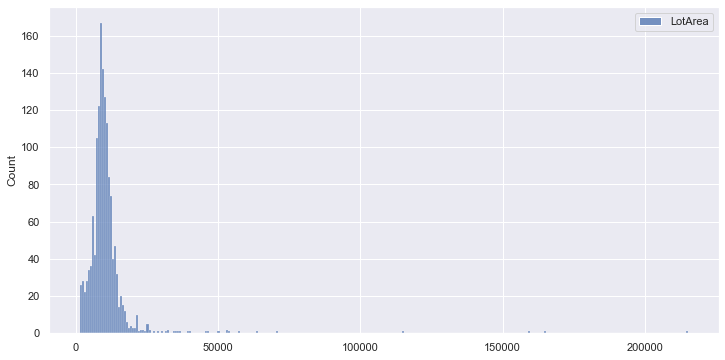

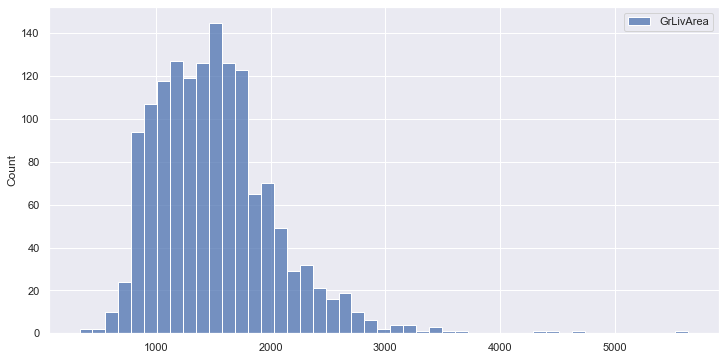

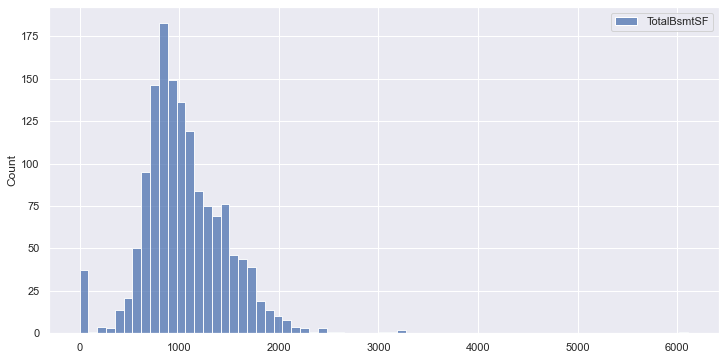

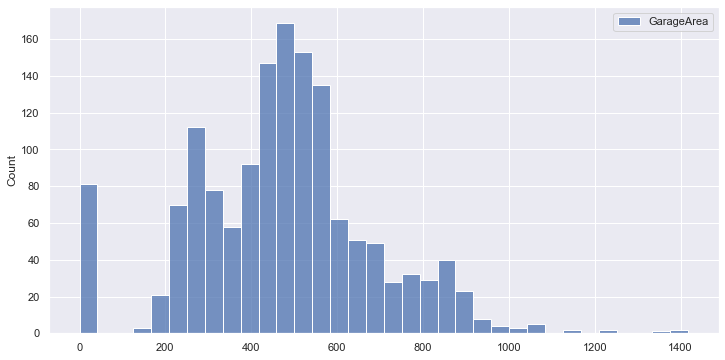

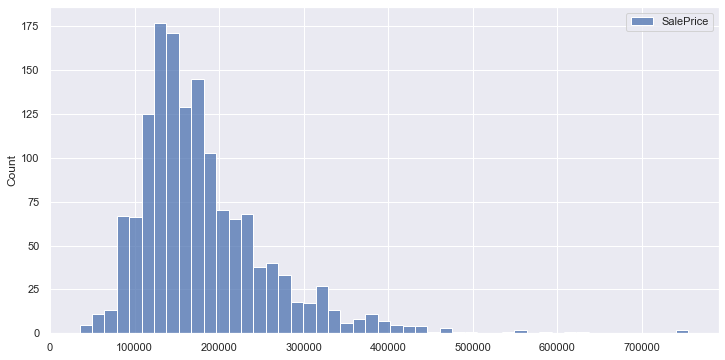

In [10]:
# Histplots of all variables
f = plt.figure(figsize=(12, 6))
sb.histplot(data = la)

f = plt.figure(figsize=(12, 6))
sb.histplot(data = gla)

f = plt.figure(figsize=(12, 6))
sb.histplot(data = tb)

f = plt.figure(figsize=(12, 6))
sb.histplot(data = ga)

f = plt.figure(figsize=(12, 6))
sb.histplot(data = sp)

### b) Comment if the distributions look like “Normal Distribution”, or different. Use the .skew() method to find the “skewness” of each of the five distributions. Which of the variables has the maximum number of outliers?

LotArea
> Looks like a normal distribution.

GrLivArea
> Somewhat like a normal distribution, leaning towards the right side.

TotalBsmtSF
> Can barely resemble a normal distribution, has a lump to the right and a bulk to the left.

GarageArea
> Does not resemble a normal distribution at all.

SalePrice
> Somewhat like a normal distribution

In [11]:
houseNumData.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

### c) Check the relationship amongst the variables using mutual correlation and the correlation heatmap. Comment which of the variables has the strongest correlation with “SalePrice”. Is this useful in predicting “SalePrice”?

In [ ]:
houseNumData.corr()

In [ ]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(houseNumData.corr(), vmin=-1, vmax=1, annot = True)

GrLivArea has the strongest correlation with SalePrice.

This may be useful in predicting SalePrice but may not be if used alone.

### d) Check the relationship amongst the variables using mutual jointplots and an overall pairplot. Comment which of the variables has the strongest linear relation with “SalePrice”. Is this useful in predicting “SalePrice”?

In [ ]:
sb.jointplot(data=houseNumData, x = "LotArea", y = "SalePrice")
sb.jointplot(data=houseNumData, x = "GrLivArea", y = "SalePrice")
sb.jointplot(data=houseNumData, x = "TotalBsmtSF", y = "SalePrice")
sb.jointplot(data=houseNumData, x = "GarageArea", y = "SalePrice")
sb.jointplot(data=houseNumData, x = "SalePrice", y = "SalePrice")

GrLivArea has the strongest correlation with SalePrice again.

This may be useful in predicting SalePrice.

---
## Problem 2: Analysis of Categorical Variables


In [ ]:
houseCatData = pd.DataFrame(hprices[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.head()

### a) Convert each of these variables into “category” data type (note that some are “int64”, and some are “object”).

In [ ]:
houseCatData.info()

In [ ]:
# Change to category data type: By converting an existing column to a category dtype:
houseCatData['MSSubClass'] = houseCatData['MSSubClass'].astype("category")
houseCatData['Neighborhood'] = houseCatData['Neighborhood'].astype("category")
houseCatData['BldgType'] = houseCatData['BldgType'].astype("category")
houseCatData['OverallQual'] = houseCatData['OverallQual'].astype("category")

houseCatData.info()

In [ ]:
# Change to category data type: By specifying dtype when constructing a Series
msc = pd.Series(houseCatData['MSSubClass'], dtype="category")
nb = pd.Series(houseCatData['Neighborhood'], dtype="category")
bt = pd.Series(houseCatData['BldgType'], dtype="category")
oq = pd.Series(houseCatData['OverallQual'], dtype="category")

### b) Check the individual statistical description and visualize the distributions (catplot) of each of these variables.

MSSubClass: Identifies the type of dwelling involved in the sale.

In [ ]:
print("--- Description ---\n", houseCatData['MSSubClass'].describe(), sep="", end="\n\n")
print("--- Value Counts ---\n", houseCatData['MSSubClass'].value_counts(), sep="")

sb.catplot(data = houseCatData, y = "MSSubClass", kind='count')

Neighborhood: Physical locations within Ames city limits

In [ ]:
print("--- Description ---\n", houseCatData['Neighborhood'].describe(), sep="", end="\n\n")
print("--- Value Counts ---\n", houseCatData['Neighborhood'].value_counts(), sep="")

sb.catplot(data = houseCatData, y = "Neighborhood", kind='count')

BldgType: Type of dwelling

In [ ]:
print("--- Description ---\n", bt.describe(), sep="", end="\n\n")
print("--- Value Counts ---\n", bt.value_counts(), sep="")

sb.catplot(data = houseCatData, y = "BldgType", kind='count')

OverallQual: Rates the overall material and finish of the house

In [ ]:
print("--- Description ---\n", oq.describe(), sep="", end="\n\n")
print("--- Value Counts ---\n", oq.value_counts(), sep="")

sb.catplot(data = houseCatData, y = "OverallQual", kind='count')

### c) One may check the relation amongst two categorical variables through the bi-variate joint heatmap of counts. Use groupby() command to generate joint heatmap of counts for “OverallQual” against the other three variables. Comment if this is useful in identifying the relation between “OverallQual” with the other variables.

In [ ]:
# MSSubClass vs OverallQual
f = plt.figure(figsize=(17, 12))
sb.heatmap(houseCatData.groupby(['MSSubClass', 'OverallQual']).size().unstack(),\
              linewidths=1, annot=True, annot_kws={"size": 18}, cmap="BuGn")

In [ ]:
# Neighborhood vs OverallQual
f = plt.figure(figsize=(18, 14))
sb.heatmap(houseCatData.groupby(['Neighborhood', 'OverallQual']).size().unstack(),\
              linewidths=1, annot=True, annot_kws={"size": 18}, cmap="BuGn")

In [ ]:
# BldgType vs OverallQual
f = plt.figure(figsize=(14, 5))
sb.heatmap(houseCatData.groupby(['BldgType', 'OverallQual']).size().unstack(),\
              linewidths=1, annot=True, annot_kws={"size": 18}, cmap="BuGn")

This is slightly useful in identifying the relation between "OverallQual" with the other variables.

It shows insights into the range of OverallQual where each category of the other variables fall into.

### d) Draw boxplots of “SalePrice” against each of these categorical variables. Notice the patterns in these boxplots. Comment on which of these variables has the most influence in predicting “SalePrice”.

In [ ]:
# join SalePrice with the categorical variables
joint = pd.concat([hprices['SalePrice'], houseCatData], axis=1)
joint.head()

In [ ]:
# MSSubCLass vs SalePrice
f = plt.figure(figsize=(12, 15))
sb.boxplot(data = joint, y = "MSSubClass", x = "SalePrice")

In [ ]:
# Neighborhood vs SalePrice
f = plt.figure(figsize=(14, 12))
sb.boxplot(data = joint, y = "Neighborhood", x = "SalePrice")

In [ ]:
# BldgType vs SalePrice
f = plt.figure(figsize=(12, 10))
sb.boxplot(data = joint, y = "BldgType", x = "SalePrice")

In [ ]:
# OverallQual vs SalePrice
f = plt.figure(figsize=(15, 9))
sb.boxplot(data = joint, y = "OverallQual", x = "SalePrice")

OverallQual has the most influence in predicting SalePrice because each of its category divisions has a clear set of differing SalePrices, while other variables have category divisions not so clear in their own set of SalePrices.